# Exploring the phase space of a jet: 1-D Unfolding  (for now)

## Unfolding the the $N$-subjettiness bases in semileptonic $t\bar{t}$ events at $\sqrt{s} = 13$ TeV

#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table

Welcome to JupyROOT 6.18/00


#### Save a nametag describing the selection applied to events being read from the input file below. This is used to name the saved plots.

In [2]:
nametag = 'Selection from AN-19-074'

In [3]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print (lumi)
ptmin = 200.
ptmax = 1500.
mSDmin = 65.
mSDmax = 125.
leptWpTmin = 200.

35.92


#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


### Using Powheg+Pythia8 samples as gen and MC and MG5+P8 as "data"

In [5]:
filelist = []
path = '../AutoObs/CMS/New_Sel/TTrecogen/1/*.root'
files=glob.glob(path)   
for f in files:     
    filelist.append(f)
        
print (len(filelist))
dataset = []
c=0
for f in filelist:
    F = ROOT.TFile.Open(f, 'read')
    
    T = F.Get("Events");
    
    
    
    
    
    data = rtnpy. tree2array(T, branches=['goodrecojet0_softdrop_mass',
                                      'goodrecojet0_tau_0p5_0','goodrecojet0_tau_1_0','goodrecojet0_tau_2_0',
                                      'goodrecojet0_tau_0p5_1','goodrecojet0_tau_1_1','goodrecojet0_tau_2_1',
                                      'goodrecojet0_tau_0p5_2','goodrecojet0_tau_1_2','goodrecojet0_tau_2_2',
                                      'goodrecojet0_tau_0p5_3','goodrecojet0_tau_1_3','goodrecojet0_tau_2_3',
                                      'goodrecojet0_tau_0p5_4','goodrecojet0_tau_1_4','goodrecojet0_tau_2_4',
                                      'goodrecojet0_tau_0p5_5','goodrecojet0_tau_1_5','goodrecojet0_tau_2_5',
                                      'goodrecojet0_tau_0p5_6','goodrecojet0_tau_1_6','goodrecojet0_tau_2_6',
                                      'goodrecojet0_mass', 'goodrecojet0_pt', 'goodrecojet0_eta',
                                      'goodrecojet0_phi',
                                      'MET', 'goodrecojet0_tau21', 'goodrecojet0_N21',
                                      'FatJet_tau1','FatJet_tau2','FatJet_tau3','FatJet_tau4', 'leptonicW_pT', 
                                      'lepton_pT', 'puWeight', 'PV_npvsGood', 'btagWeight_CSVV2',
                                      'dr_LepJet', 'dphi_MetJet', 'dphi_WJet','genmatchedrecoAK8', 'passedMETfilters',
                                      'goodgenjet0_mass',
                                      'goodgenjet0_tau_0p5_0','goodgenjet0_tau_1_0','goodgenjet0_tau_2_0',
                                      'goodgenjet0_tau_0p5_1','goodgenjet0_tau_1_1','goodgenjet0_tau_2_1',
                                      'goodgenjet0_tau_0p5_2','goodgenjet0_tau_1_2','goodgenjet0_tau_2_2',
                                      'goodgenjet0_tau_0p5_3','goodgenjet0_tau_1_3','goodgenjet0_tau_2_3',
                                      'goodgenjet0_tau_0p5_4','goodgenjet0_tau_1_4','goodgenjet0_tau_2_4',
                                      'goodgenjet0_tau_0p5_5','goodgenjet0_tau_1_5','goodgenjet0_tau_2_5',
                                      'goodgenjet0_tau_0p5_6','goodgenjet0_tau_1_6','goodgenjet0_tau_2_6',
                                      'goodgenjet0_pt', 'goodgenjet0_eta', 'goodgenjet0_phi'
                                        ])

    
    if len(dataset)==0:
        print (c)
        dataset=data
    else:
        dataset = np.concatenate((dataset,data))
        
    c=c+1
    if c%5==0:
        print ("on file %d"%c)

577
0
on file 5
on file 10
on file 15
on file 20
on file 25
on file 30
on file 35
on file 40
on file 45
on file 50
on file 55
on file 60
on file 65
on file 70
on file 75
on file 80
on file 85
on file 90
on file 95
on file 100
on file 105
on file 110
on file 115
on file 120
on file 125
on file 130
on file 135
on file 140
on file 145
on file 150
on file 155
on file 160
on file 165
on file 170
on file 175
on file 180
on file 185
on file 190
on file 195
on file 200
on file 205
on file 210
on file 215
on file 220
on file 225
on file 230
on file 235
on file 240
on file 245
on file 250
on file 255
on file 260
on file 265
on file 270
on file 275
on file 280
on file 285
on file 290
on file 295
on file 300
on file 305
on file 310
on file 315
on file 320
on file 325
on file 330
on file 335
on file 340
on file 345
on file 350
on file 355
on file 360
on file 365
on file 370
on file 375
on file 380
on file 385
on file 390
on file 395
on file 400
on file 405
on file 410
on file 415
on file 420
on fil

Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [6]:
#pars = [1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 0.49631107, -0.91138405, 0.11273356, -0.26872, 0.04777313, 0.06521296, 0.51138633, -0.03617261]
#pars = [0.,-1.,0.,0.,1.,0.,0.,0.]
pars = -1* np.array([-0.195,  1.183,  -0.219,  0.674,  -0.44,   0.003, -0.634,  -0.042]) #[ 0.06849562,  0.99606407, -0.20875171,  0.3780923 , -0.07821123, -0.05920516, -0.79644126,  0.02925767]#[1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 1.0470642 , 0.3308942 , -0.08472812, 0.4989206, -0.2598824, 0.00597894, -0.6826088 , -0.06705493]

c=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        c=c+1

print (c)
TT16reco_npv = np.ones(c)
TT16reco_beta4W = np.ones(c)
TT16reco_pt = np.ones(c)
TT16reco_eta = np.ones(c)
TT16reco_met = np.ones(c)
TT16reco_lWpt = np.ones(c)
TT16reco_lept_pT = np.ones(c)
TT16reco_mass = np.ones(c)
TT16reco_sdmass = np.ones(c)
TT16reco_tau1 = np.ones(c)
TT16reco_tau2 = np.ones(c)
TT16reco_tau3 = np.ones(c)
TT16reco_tau4 = np.ones(c)
TT16reco_tau21 = np.ones(c)
TT16reco_N21 = np.ones(c)
TT16reco_puWeight = np.ones(c)
TT16reco_btagWeight = np.ones(c)
fatjet_TT16reco_tau1 = np.ones(c)
fatjet_TT16reco_tau2 = np.ones(c)
fatjet_TT16reco_tau3 = np.ones(c)
fatjet_TT16reco_tau4 = np.ones(c)
fatjet_TT16reco_tau21 = np.ones(c)


TT16reco_nSub_basis = np.ones((c,21))

TT16reco_tau1_0p5 = np.ones(c)
TT16reco_tau1_1 = np.ones(c)
TT16reco_tau1_2 = np.ones(c)
TT16reco_tau2_0p5 = np.ones(c)
TT16reco_tau2_1 = np.ones(c)
TT16reco_tau2_2 = np.ones(c)
TT16reco_tau3_0p5 = np.ones(c)
TT16reco_tau3_1 = np.ones(c)
TT16reco_tau3_2 = np.ones(c)
TT16reco_tau4_0p5 = np.ones(c)
TT16reco_tau4_1 = np.ones(c)
TT16reco_tau4_2 = np.ones(c)
TT16reco_tau5_0p5 = np.ones(c)
TT16reco_tau5_1 = np.ones(c)
TT16reco_tau5_2 = np.ones(c)
TT16reco_tau6_0p5 = np.ones(c)
TT16reco_tau6_1 = np.ones(c)
TT16reco_tau6_2 = np.ones(c)
TT16reco_tau7_0p5 = np.ones(c)
TT16reco_tau7_1 = np.ones(c)
TT16reco_tau7_2 = np.ones(c)

TT16gen_tau21 = np.ones(c)
TT16gen_beta4W = np.ones(c)
TT16gen_pt = np.ones(c)
TT16gen_eta = np.ones(c)
TT16gen_mass = np.ones(c)

TT16gen_nSub_basis = np.ones((c,21))

TT16gen_tau1_0p5 = np.ones(c)
TT16gen_tau1_1 = np.ones(c)
TT16gen_tau1_2 = np.ones(c)
TT16gen_tau2_0p5 = np.ones(c)
TT16gen_tau2_1 = np.ones(c)
TT16gen_tau2_2 = np.ones(c)
TT16gen_tau3_0p5 = np.ones(c)
TT16gen_tau3_1 = np.ones(c)
TT16gen_tau3_2 = np.ones(c)
TT16gen_tau4_0p5 = np.ones(c)
TT16gen_tau4_1 = np.ones(c)
TT16gen_tau4_2 = np.ones(c)
TT16gen_tau5_0p5 = np.ones(c)
TT16gen_tau5_1 = np.ones(c)
TT16gen_tau5_2 = np.ones(c)
TT16gen_tau6_0p5 = np.ones(c)
TT16gen_tau6_1 = np.ones(c)
TT16gen_tau6_2 = np.ones(c)
TT16gen_tau7_0p5 = np.ones(c)
TT16gen_tau7_1 = np.ones(c)
TT16gen_tau7_2 = np.ones(c)

c=0
d1=0
d2=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #print dataset[i][29]
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        TT16reco_pt[c] = dataset[i][23]
        TT16reco_eta[c] = dataset[i][24]
        TT16reco_met[c] = dataset[i][26]
        TT16reco_mass[c] = dataset[i][22]
        TT16reco_lWpt[c] = dataset[i][33]
        TT16reco_lept_pT[c] = dataset[i][34]
        TT16reco_sdmass[c] = dataset[i][0]
        TT16reco_tau1[c] = dataset[i][2]
        TT16reco_tau2[c] = dataset[i][5]
        TT16reco_tau3[c] = dataset[i][8]
        TT16reco_tau4[c] = dataset[i][11]
        TT16reco_tau21[c] = dataset[i][27]
        TT16reco_N21[c] = dataset[i][28]
        TT16reco_puWeight[c] = dataset[i][35]
        TT16reco_btagWeight[c] = dataset[i][37]
        TT16reco_npv[c] = dataset[i][36]
        fatjet_TT16reco_tau1[c] = dataset[i][29][0]
        fatjet_TT16reco_tau2[c] = dataset[i][30][0]
        fatjet_TT16reco_tau3[c] = dataset[i][31][0]
        fatjet_TT16reco_tau4[c] = dataset[i][32][0]
        
        for z in range(0,21):
            TT16reco_nSub_basis[c][z] = dataset[i][z+1]
        TT16reco_tau1_0p5[c] = dataset[i][1]
        TT16reco_tau1_1[c] = dataset[i][2]
        TT16reco_tau1_2[c] = dataset[i][3]
        TT16reco_tau2_0p5[c] = dataset[i][4]
        TT16reco_tau2_1[c] = dataset[i][5]
        TT16reco_tau2_2[c] = dataset[i][6]

        
        TT16gen_pt[c] = dataset[i][65]
        TT16gen_eta[c] = dataset[i][66]
        TT16gen_mass[c] = dataset[i][43]
        
        for z in range(0,21):
            TT16gen_nSub_basis[c][z] = dataset[i][z+44]   
        
        TT16gen_tau1_0p5[c] = dataset[i][44]
        TT16gen_tau1_1[c] = dataset[i][45]
        TT16gen_tau1_2[c] = dataset[i][46]
        TT16gen_tau2_0p5[c] = dataset[i][47]
        TT16gen_tau2_1[c] = dataset[i][48]
        TT16gen_tau2_2[c] = dataset[i][49]
        
        
        if TT16reco_tau1_1[c]!=0:
            TT16reco_tau21[d1] = TT16reco_tau2_1[c]/TT16reco_tau1_1[c]
            d1=d1+1
        TT16reco_beta4W[c]=((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))
        
        if TT16gen_tau1_1[c]!=0:
            TT16gen_tau21[d2] = TT16gen_tau2_1[c]/TT16gen_tau1_1[c]
            d2=d2+1
        TT16gen_beta4W[c]=((dataset[i][44])**(pars[0]))*((dataset[i][45])**(pars[1]))*((dataset[i][46])**(pars[2]))*((dataset[i][47])**(pars[3]))*((dataset[i][48])**(pars[4]))*((dataset[i][49])**(pars[5]))*((dataset[i][51])**(pars[6]))*((dataset[i][52])**(pars[7]))
        if np.isnan(TT16gen_beta4W[c]): 
            print ("nan nan nan!!!", c, (dataset[i][44]), (dataset[i][45]), (dataset[i][46]), (dataset[i][47]), (dataset[i][48]), (dataset[i][49]), (dataset[i][51]), (dataset[i][52]), (dataset[i][65]), (dataset[i][66]), (dataset[c][43]))
        if np.isinf(TT16gen_beta4W[c]): 
            print ("inf inf inf!!!", c)
        
        c=c+1
#print np.min(var_sig), np.max(var_sig)
#TT16reco_SF = np.exp(0.0615+0.0005*TT16reco_pt)
#print TT16reco_SF, np.mean(TT16reco_SF)

57158


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:151: RuntimeWarning: divide by zero encountered in power
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in double_scalars


('nan nan nan!!!', 15422, 0.03056116, 0.001708532, 0.00031756982, 0.0, 0.0, 0.0, 0.0, 0.0, 184.54639, 1.9655762, 93.5625)


## 1-D unfolding of $N$-subjettiness ratios

In [7]:
TT16gen_nSub_basis = np.delete(TT16gen_nSub_basis[:,:],15422,0)
print TT16gen_nSub_basis.shape[0]

TT16reco_nSub_basis = np.delete(TT16reco_nSub_basis[:,:],15422,0)
print TT16reco_nSub_basis.shape[0]

57157
57157


In [8]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *
length = np.int(TT16gen_nSub_basis.shape[0])
unfold_length = np.int(np.floor(0.75*length))

In [9]:
TT16truth_nSub_basis = TT16gen_nSub_basis[unfold_length:,:]
TT16gen_nSub_basis = TT16gen_nSub_basis[:unfold_length,:]
print TT16gen_nSub_basis.shape[0], TT16truth_nSub_basis.shape[0]

TT16data_nSub_basis = TT16reco_nSub_basis[unfold_length:,:]
TT16reco_nSub_basis = TT16reco_nSub_basis[:unfold_length,:]
print TT16reco_nSub_basis.shape[0], TT16data_nSub_basis.shape[0]

42867 14290
42867 14290


# Unfold $\tau_{2,1}^{(1)}$

Get the response matrix and input 1D distributions for unfolding.

In [10]:
print np.min(TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])
print np.min(TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])
print np.max(TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])
print np.max(TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])

0.033822936522658054
0.053198257077817446
1.16677535123796
1.1308962316518507


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [11]:
nDet=32
nGen=16
xminDet=0.0
xmaxDet=1.2
xminGen=0.0
xmaxGen=1.2
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [12]:
nDet=40
nGen=20

gen_bins = [x for x in np.linspace(num=17, start=0.14, stop=1.)]
#print gen_bins
gen_bins = np.concatenate((np.array([0., 0.05]), gen_bins, np.array([1.1, 1.2])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=33, start=0.14, stop=1.)])
#print det_bins
det_bins = np.concatenate((np.array([0., 0.025, 0.075 ]), det_bins, np.array([1.05, 1.1, 1.15, 1.2])))
print det_bins, det_bins.shape[0]
#nt_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
#TH1F* h = new TH1F("n","t", binnum, bins);

xminDet=0.
xmaxDet=0.8
xminGen=0.
xmaxGen=0.8
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


[0.      0.05    0.14    0.19375 0.2475  0.30125 0.355   0.40875 0.4625
 0.51625 0.57    0.62375 0.6775  0.73125 0.785   0.83875 0.8925  0.94625
 1.      1.1     1.2    ] 21
[0.       0.025    0.075    0.14     0.166875 0.19375  0.220625 0.2475
 0.274375 0.30125  0.328125 0.355    0.381875 0.40875  0.435625 0.4625
 0.489375 0.51625  0.543125 0.57     0.596875 0.62375  0.650625 0.6775
 0.704375 0.73125  0.758125 0.785    0.811875 0.83875  0.865625 0.8925
 0.919375 0.94625  0.973125 1.       1.05     1.1      1.15     1.2     ] 40


In [13]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenData, TT16truth_nSub_basis[:,4]/TT16truth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, TT16data_nSub_basis[:,4]/TT16data_nSub_basis[:,1])


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros(((TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1]).shape[0], 2))
hist2Dfill[:,0] = (TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1]).flatten()
hist2Dfill[:,1] = (TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1]).flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [14]:
response.SetTitle(";#tau_{2,1}^{1}(det);#tau_{2,1}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{2,1}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{2,1}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{2,1}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{2,1}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

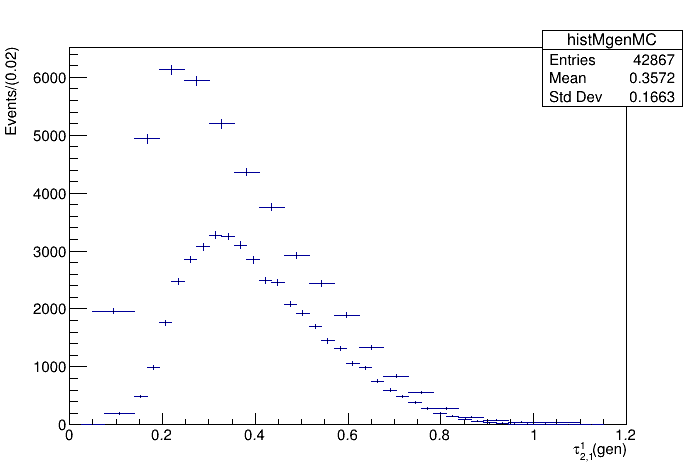

In [15]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


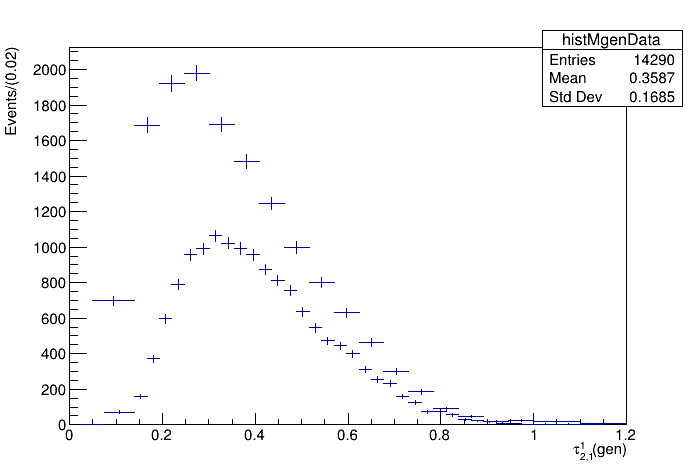

In [16]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

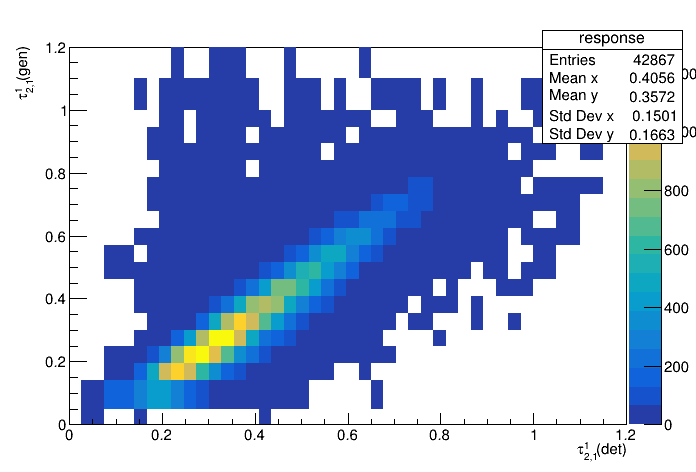

In [17]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [18]:
#### In MC :

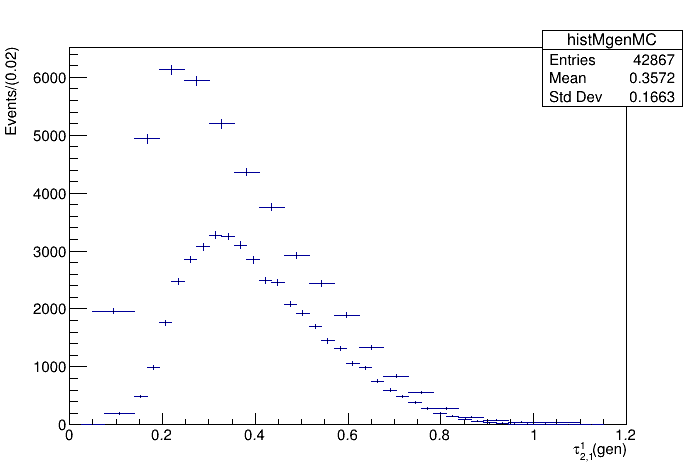

In [19]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

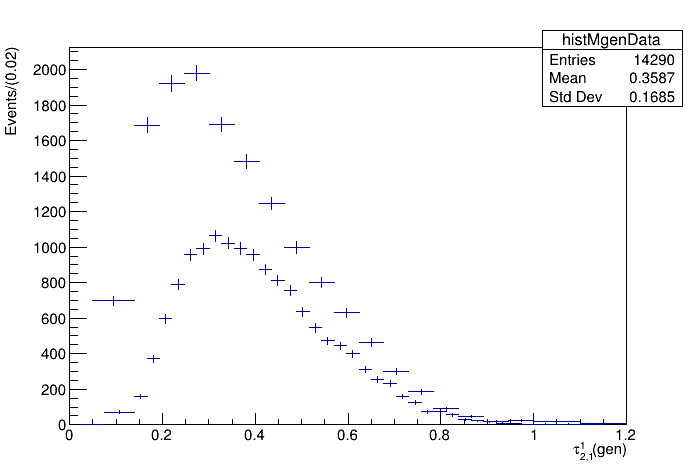

In [20]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [21]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 39 input bins and 20 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #21 (yaxis:#tau_{2,1}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [22]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


2

Warning in <TUnfoldDensity::SetInput>: 2/39 input bins have zero error, and are ignored.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [23]:
print 'regularizing'
nScan=50
tauMin=-5.0
tauMax=3.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

regularizing
doing the unfolding
getting the results


Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=1.360793 Y=8.865567
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.656580 X=1.411286 Y=8.074623
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.156580 X=1.370417 Y=8.414984
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.656580 X=1.361537 Y=8.717135
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.906580 X=1.383995 Y=8.242749
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.406580 X=1.363917 Y=8.584405
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.031580 X=1.376074 Y=8.327818
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.781580 X=1.395101 Y=8.159663
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.281580 X=1.366492 Y=8.501878
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.531580 X=1.362373 Y=8.657305
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.094080 X=1.373000 Y=8.371251
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.219080 X=1.368265 Y=8.458674
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.719080 X=1.402392 Y=8.117720

AttributeError: 'THStack' object has no attribute 'GetBinContent'

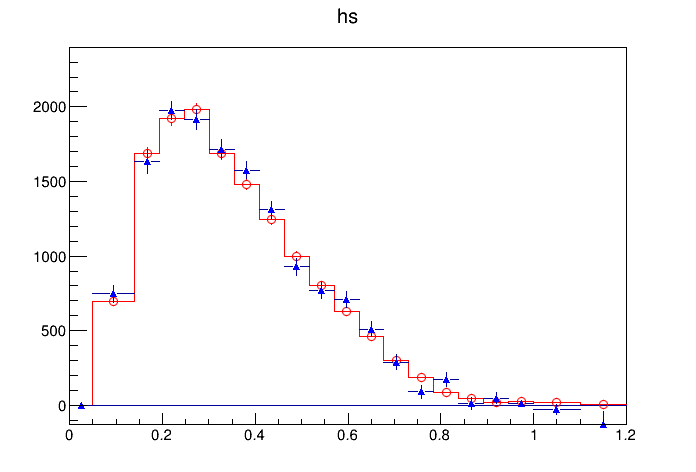

In [24]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add
hs.SetMaximum(2400)
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()

### Unfolding ${\tau_{2,1}^{(1)}}^\mathrm{WTA}$ 

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


### Using Powheg+Pythia8 samples as gen and MC and MG5+P8 as "data"

In [ ]:
filelist = []
path = '../AutoObs/CMS/New_Sel/TTrecogen/1/*.root'
files=glob.glob(path)   
for f in files:     
    filelist.append(f)
        
print (len(filelist))
dataset = []
c=0
for f in filelist:
    F = ROOT.TFile.Open(f, 'read')
    
    T = F.Get("Events");
    
    
    
    
    
    data = rtnpy. tree2array(T, branches=['goodrecojet0_softdrop_mass',
                                      'goodrecojet0_tau_0p5_0_WTA_kT','goodrecojet0_tau_1_0_WTA_kT','goodrecojet0_tau_2_0_WTA_kT',
                                      'goodrecojet0_tau_0p5_1_WTA_kT','goodrecojet0_tau_1_1_WTA_kT','goodrecojet0_tau_2_1_WTA_kT',
                                      'goodrecojet0_tau_0p5_2_WTA_kT','goodrecojet0_tau_1_2_WTA_kT','goodrecojet0_tau_2_2_WTA_kT',
                                      'goodrecojet0_tau_0p5_3_WTA_kT','goodrecojet0_tau_1_3_WTA_kT','goodrecojet0_tau_2_3_WTA_kT',
                                      'goodrecojet0_tau_0p5_4_WTA_kT','goodrecojet0_tau_1_4_WTA_kT','goodrecojet0_tau_2_4_WTA_kT',
                                      'goodrecojet0_tau_0p5_5_WTA_kT','goodrecojet0_tau_1_5_WTA_kT','goodrecojet0_tau_2_5_WTA_kT',
                                      'goodrecojet0_tau_0p5_6_WTA_kT','goodrecojet0_tau_1_6_WTA_kT','goodrecojet0_tau_2_6_WTA_kT',
                                      'goodrecojet0_mass', 'goodrecojet0_pt', 'goodrecojet0_eta',
                                      'goodrecojet0_phi',
                                      'MET', 'goodrecojet0_tau21', 'goodrecojet0_N21',
                                      'FatJet_tau1','FatJet_tau2','FatJet_tau3','FatJet_tau4', 'leptonicW_pT', 
                                      'lepton_pT', 'puWeight', 'PV_npvsGood', 'btagWeight_CSVV2',
                                      'dr_LepJet', 'dphi_MetJet', 'dphi_WJet','genmatchedrecoAK8', 'passedMETfilters',
                                      'goodgenjet0_mass',
                                      'goodgenjet0_tau_0p5_0_WTA_kT','goodgenjet0_tau_1_0_WTA_kT','goodgenjet0_tau_2_0_WTA_kT',
                                      'goodgenjet0_tau_0p5_1_WTA_kT','goodgenjet0_tau_1_1_WTA_kT','goodgenjet0_tau_2_1_WTA_kT',
                                      'goodgenjet0_tau_0p5_2_WTA_kT','goodgenjet0_tau_1_2_WTA_kT','goodgenjet0_tau_2_2_WTA_kT',
                                      'goodgenjet0_tau_0p5_3_WTA_kT','goodgenjet0_tau_1_3_WTA_kT','goodgenjet0_tau_2_3_WTA_kT',
                                      'goodgenjet0_tau_0p5_4_WTA_kT','goodgenjet0_tau_1_4_WTA_kT','goodgenjet0_tau_2_4_WTA_kT',
                                      'goodgenjet0_tau_0p5_5_WTA_kT','goodgenjet0_tau_1_5_WTA_kT','goodgenjet0_tau_2_5_WTA_kT',
                                      'goodgenjet0_tau_0p5_6_WTA_kT','goodgenjet0_tau_1_6_WTA_kT','goodgenjet0_tau_2_6_WTA_kT',
                                      'goodgenjet0_pt', 'goodgenjet0_eta', 'goodgenjet0_phi'
                                        ])

    
    if len(dataset)==0:
        print (c)
        dataset=data
    else:
        dataset = np.concatenate((dataset,data))
        
    c=c+1
    if c%5==0:
        print ("on file %d"%c)

577
0
on file 5
on file 10
on file 15
on file 20
on file 25
on file 30
on file 35
on file 40
on file 45
on file 50
on file 55
on file 60
on file 65
on file 70
on file 75
on file 80
on file 85
on file 90
on file 95
on file 100
on file 105
on file 110
on file 115
on file 120
on file 125
on file 130
on file 135
on file 140
on file 145
on file 150
on file 155
on file 160
on file 165
on file 170
on file 175
on file 180
on file 185
on file 190
on file 195
on file 200
on file 205
on file 210
on file 215
on file 220
on file 225
on file 230
on file 235
on file 240
on file 245
on file 250
on file 255
on file 260
on file 265
on file 270
on file 275
on file 280
on file 285
on file 290
on file 295
on file 300
on file 305
on file 310
on file 315
on file 320
on file 325
on file 330
on file 335
on file 340
on file 345
on file 350
on file 355
on file 360
on file 365
on file 370
on file 375
on file 380
on file 385
on file 390
on file 395
on file 400
on file 405


In [ ]:
#pars = [1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 0.49631107, -0.91138405, 0.11273356, -0.26872, 0.04777313, 0.06521296, 0.51138633, -0.03617261]
#pars = [0.,-1.,0.,0.,1.,0.,0.,0.]
pars = -1* np.array([-0.195,  1.183,  -0.219,  0.674,  -0.44,   0.003, -0.634,  -0.042]) #[ 0.06849562,  0.99606407, -0.20875171,  0.3780923 , -0.07821123, -0.05920516, -0.79644126,  0.02925767]#[1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 1.0470642 , 0.3308942 , -0.08472812, 0.4989206, -0.2598824, 0.00597894, -0.6826088 , -0.06705493]

c=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        c=c+1

print (c)
TT16reco_npv = np.ones(c)
TT16reco_beta4W = np.ones(c)
TT16reco_pt = np.ones(c)
TT16reco_eta = np.ones(c)
TT16reco_met = np.ones(c)
TT16reco_lWpt = np.ones(c)
TT16reco_lept_pT = np.ones(c)
TT16reco_mass = np.ones(c)
TT16reco_sdmass = np.ones(c)
TT16reco_tau1 = np.ones(c)
TT16reco_tau2 = np.ones(c)
TT16reco_tau3 = np.ones(c)
TT16reco_tau4 = np.ones(c)
TT16reco_tau21 = np.ones(c)
TT16reco_N21 = np.ones(c)
TT16reco_puWeight = np.ones(c)
TT16reco_btagWeight = np.ones(c)
fatjet_TT16reco_tau1 = np.ones(c)
fatjet_TT16reco_tau2 = np.ones(c)
fatjet_TT16reco_tau3 = np.ones(c)
fatjet_TT16reco_tau4 = np.ones(c)
fatjet_TT16reco_tau21 = np.ones(c)


TT16reco_nSub_basis = np.ones((c,21))

TT16reco_tau1_0p5 = np.ones(c)
TT16reco_tau1_1 = np.ones(c)
TT16reco_tau1_2 = np.ones(c)
TT16reco_tau2_0p5 = np.ones(c)
TT16reco_tau2_1 = np.ones(c)
TT16reco_tau2_2 = np.ones(c)
TT16reco_tau3_0p5 = np.ones(c)
TT16reco_tau3_1 = np.ones(c)
TT16reco_tau3_2 = np.ones(c)
TT16reco_tau4_0p5 = np.ones(c)
TT16reco_tau4_1 = np.ones(c)
TT16reco_tau4_2 = np.ones(c)
TT16reco_tau5_0p5 = np.ones(c)
TT16reco_tau5_1 = np.ones(c)
TT16reco_tau5_2 = np.ones(c)
TT16reco_tau6_0p5 = np.ones(c)
TT16reco_tau6_1 = np.ones(c)
TT16reco_tau6_2 = np.ones(c)
TT16reco_tau7_0p5 = np.ones(c)
TT16reco_tau7_1 = np.ones(c)
TT16reco_tau7_2 = np.ones(c)

TT16gen_tau21 = np.ones(c)
TT16gen_beta4W = np.ones(c)
TT16gen_pt = np.ones(c)
TT16gen_eta = np.ones(c)
TT16gen_mass = np.ones(c)

TT16gen_nSub_basis = np.ones((c,21))

TT16gen_tau1_0p5 = np.ones(c)
TT16gen_tau1_1 = np.ones(c)
TT16gen_tau1_2 = np.ones(c)
TT16gen_tau2_0p5 = np.ones(c)
TT16gen_tau2_1 = np.ones(c)
TT16gen_tau2_2 = np.ones(c)
TT16gen_tau3_0p5 = np.ones(c)
TT16gen_tau3_1 = np.ones(c)
TT16gen_tau3_2 = np.ones(c)
TT16gen_tau4_0p5 = np.ones(c)
TT16gen_tau4_1 = np.ones(c)
TT16gen_tau4_2 = np.ones(c)
TT16gen_tau5_0p5 = np.ones(c)
TT16gen_tau5_1 = np.ones(c)
TT16gen_tau5_2 = np.ones(c)
TT16gen_tau6_0p5 = np.ones(c)
TT16gen_tau6_1 = np.ones(c)
TT16gen_tau6_2 = np.ones(c)
TT16gen_tau7_0p5 = np.ones(c)
TT16gen_tau7_1 = np.ones(c)
TT16gen_tau7_2 = np.ones(c)

c=0
d1=0
d2=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #print dataset[i][29]
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        TT16reco_pt[c] = dataset[i][23]
        TT16reco_eta[c] = dataset[i][24]
        TT16reco_met[c] = dataset[i][26]
        TT16reco_mass[c] = dataset[i][22]
        TT16reco_lWpt[c] = dataset[i][33]
        TT16reco_lept_pT[c] = dataset[i][34]
        TT16reco_sdmass[c] = dataset[i][0]
        TT16reco_tau1[c] = dataset[i][2]
        TT16reco_tau2[c] = dataset[i][5]
        TT16reco_tau3[c] = dataset[i][8]
        TT16reco_tau4[c] = dataset[i][11]
        TT16reco_tau21[c] = dataset[i][27]
        TT16reco_N21[c] = dataset[i][28]
        TT16reco_puWeight[c] = dataset[i][35]
        TT16reco_btagWeight[c] = dataset[i][37]
        TT16reco_npv[c] = dataset[i][36]
        fatjet_TT16reco_tau1[c] = dataset[i][29][0]
        fatjet_TT16reco_tau2[c] = dataset[i][30][0]
        fatjet_TT16reco_tau3[c] = dataset[i][31][0]
        fatjet_TT16reco_tau4[c] = dataset[i][32][0]
        
        for z in range(0,21):
            TT16reco_nSub_basis[c][z] = dataset[i][z+1]
        TT16reco_tau1_0p5[c] = dataset[i][1]
        TT16reco_tau1_1[c] = dataset[i][2]
        TT16reco_tau1_2[c] = dataset[i][3]
        TT16reco_tau2_0p5[c] = dataset[i][4]
        TT16reco_tau2_1[c] = dataset[i][5]
        TT16reco_tau2_2[c] = dataset[i][6]

        
        TT16gen_pt[c] = dataset[i][65]
        TT16gen_eta[c] = dataset[i][66]
        TT16gen_mass[c] = dataset[i][43]
        
        for z in range(0,21):
            TT16gen_nSub_basis[c][z] = dataset[i][z+44]   
        
        TT16gen_tau1_0p5[c] = dataset[i][44]
        TT16gen_tau1_1[c] = dataset[i][45]
        TT16gen_tau1_2[c] = dataset[i][46]
        TT16gen_tau2_0p5[c] = dataset[i][47]
        TT16gen_tau2_1[c] = dataset[i][48]
        TT16gen_tau2_2[c] = dataset[i][49]
        
        
        if TT16reco_tau1_1[c]!=0:
            TT16reco_tau21[d1] = TT16reco_tau2_1[c]/TT16reco_tau1_1[c]
            d1=d1+1
        TT16reco_beta4W[c]=((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))
        
        if TT16gen_tau1_1[c]!=0:
            TT16gen_tau21[d2] = TT16gen_tau2_1[c]/TT16gen_tau1_1[c]
            d2=d2+1
        TT16gen_beta4W[c]=((dataset[i][44])**(pars[0]))*((dataset[i][45])**(pars[1]))*((dataset[i][46])**(pars[2]))*((dataset[i][47])**(pars[3]))*((dataset[i][48])**(pars[4]))*((dataset[i][49])**(pars[5]))*((dataset[i][51])**(pars[6]))*((dataset[i][52])**(pars[7]))
        if np.isnan(TT16gen_beta4W[c]): 
            print ("nan nan nan!!!", c, (dataset[i][44]), (dataset[i][45]), (dataset[i][46]), (dataset[i][47]), (dataset[i][48]), (dataset[i][49]), (dataset[i][51]), (dataset[i][52]), (dataset[i][65]), (dataset[i][66]), (dataset[c][43]))
        if np.isinf(TT16gen_beta4W[c]): 
            print ("inf inf inf!!!", c)
        
        c=c+1
#print np.min(var_sig), np.max(var_sig)
#TT16reco_SF = np.exp(0.0615+0.0005*TT16reco_pt)
#print TT16reco_SF, np.mean(TT16reco_SF)

## 1-D unfolding of $N$-subjettiness ratios

In [ ]:
TT16gen_nSub_basis = np.delete(TT16gen_nSub_basis[:,:],15422,0)
print TT16gen_nSub_basis.shape[0]

TT16reco_nSub_basis = np.delete(TT16reco_nSub_basis[:,:],15422,0)
print TT16reco_nSub_basis.shape[0]

In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *
length = np.int(TT16gen_nSub_basis.shape[0])
unfold_length = np.int(np.floor(0.8*length))

In [ ]:
TT16truth_nSub_basis = TT16gen_nSub_basis[unfold_length:,:]
TT16gen_nSub_basis = TT16gen_nSub_basis[:unfold_length,:]
print TT16gen_nSub_basis.shape[0], TT16truth_nSub_basis.shape[0]

TT16data_nSub_basis = TT16reco_nSub_basis[unfold_length:,:]
TT16reco_nSub_basis = TT16reco_nSub_basis[:unfold_length,:]
print TT16reco_nSub_basis.shape[0], TT16data_nSub_basis.shape[0]

# Unfold ${\tau_{2,1}^{(1)}}^\mathrm{WTA}$

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])
print np.min(TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])
print np.max(TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])
print np.max(TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [47]:
gen_bins = [x for x in np.linspace(num=16, start=0.15, stop=0.9)]
#print gen_bins
gen_bins = np.concatenate((np.array([0., 0.025,]), gen_bins, np.array([1.])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=33, start=0.15, stop=0.9)])
#print det_bins
det_bins = np.concatenate((np.array([0., 0.025, 0.0875]), det_bins, np.array([1.])))
print det_bins, det_bins.shape[0]

[0.    0.025 0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6
 0.65  0.7   0.75  0.8   0.85  0.9   1.   ] 19
[0.        0.025     0.0875    0.15      0.1734375 0.196875  0.2203125
 0.24375   0.2671875 0.290625  0.3140625 0.3375    0.3609375 0.384375
 0.4078125 0.43125   0.4546875 0.478125  0.5015625 0.525     0.5484375
 0.571875  0.5953125 0.61875   0.6421875 0.665625  0.6890625 0.7125
 0.7359375 0.759375  0.7828125 0.80625   0.8296875 0.853125  0.8765625
 0.9       1.       ] 37


In [ ]:
nDet=40
nGen=20

gen_bins = [x for x in np.linspace(num=17, start=0.14, stop=1.)]
#print gen_bins
gen_bins = np.concatenate((np.array([0., 0.05]), gen_bins, np.array([1.1, 1.2])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=33, start=0.14, stop=1.)])
#print det_bins
det_bins = np.concatenate((np.array([0., 0.025, 0.075 ]), det_bins, np.array([1.05, 1.1, 1.15, 1.2])))
print det_bins, det_bins.shape[0]
#nt_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
#TH1F* h = new TH1F("n","t", binnum, bins);

xminDet=0.
xmaxDet=0.8
xminGen=0.
xmaxGen=0.8
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [48]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenData, TT16truth_nSub_basis[:,4]/TT16truth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, TT16data_nSub_basis[:,4]/TT16data_nSub_basis[:,1])


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros(((TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1]).shape[0], 2))
hist2Dfill[:,0] = (TT16reco_nSub_basis[:,4]/TT16reco_nSub_basis[:,1]).flatten()
hist2Dfill[:,1] = (TT16gen_nSub_basis[:,4]/TT16gen_nSub_basis[:,1]).flatten()
fill_hist(response, hist2Dfill)

Warning in <TFile::Append>: Replacing existing TH1: histMgenMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMgenData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: response (Potential memory leak).


Set the X and Y axis labels

In [49]:
response.SetTitle(";#tau_{2,1}^{1}(det);#tau_{2,1}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{2,1}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{2,1}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{2,1}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{2,1}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

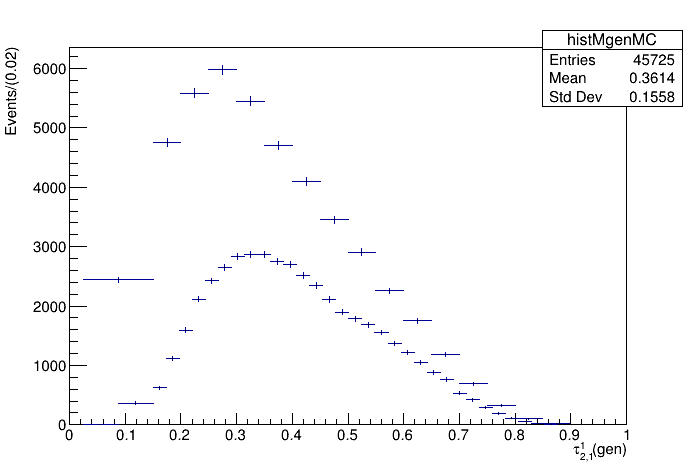

In [50]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


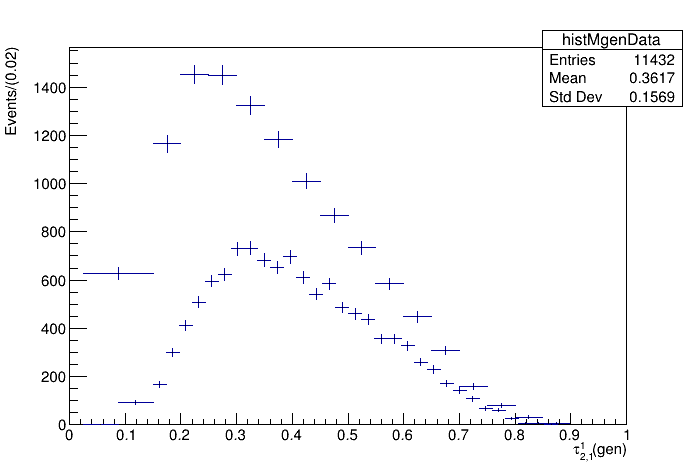

In [51]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

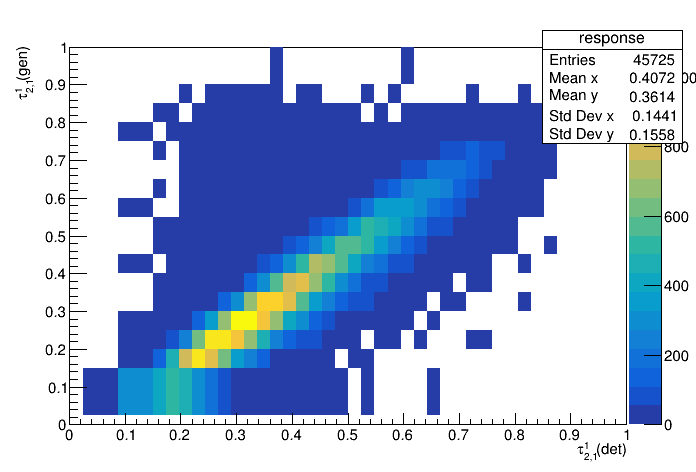

In [52]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [53]:
#### In MC :

Warning in <TCanvas::Constructor>: Deleting canvas with same name: MCcompare


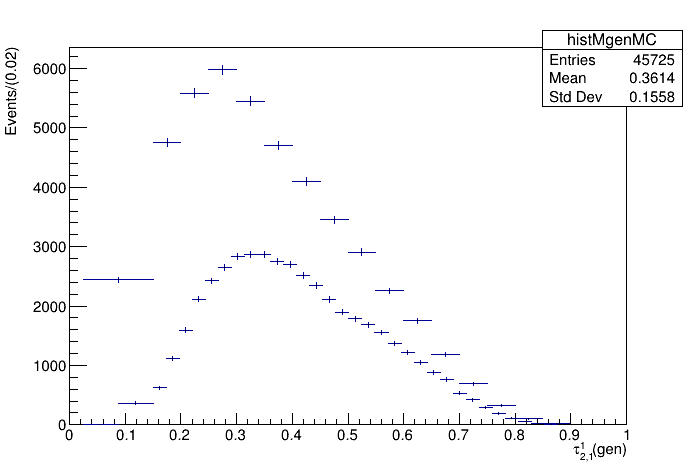

In [54]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: datadists


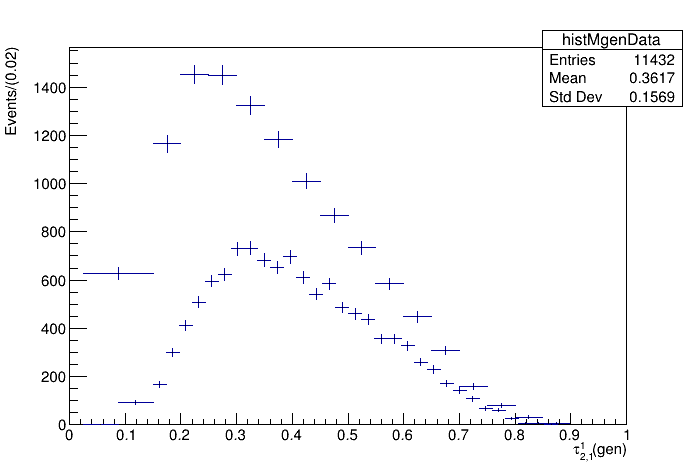

In [55]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [56]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0-1 19
Info in <TUnfold::TUnfold>: 36 input bins and 17 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (yaxis:#tau_{2,1}^{1}(gen)[0,0.025])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #19 (yaxis:#tau_{2,1}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [57]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


3

Warning in <TUnfoldDensity::SetInput>: 3/36 input bins have zero error, and are ignored.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=55
tauMin=-3.0
tauMax=3.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


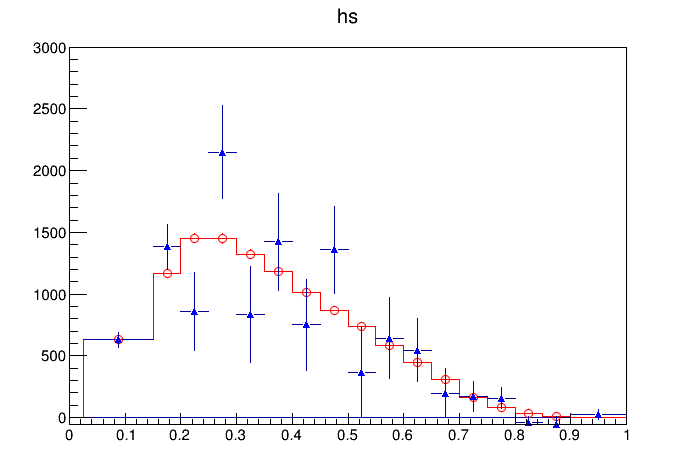

In [59]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.SetMaximum(3000)
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_{3,2}^{(1)}$

Get the response matrix and input 1D distributions for unfolding.

In [101]:
print np.min(TT16gen_nSub_basis[:,7]/TT16gen_nSub_basis[:,4])
print np.min(TT16reco_nSub_basis[:,7]/TT16reco_nSub_basis[:,4])
print np.max(TT16gen_nSub_basis[:,7]/TT16gen_nSub_basis[:,4])
print np.max(TT16reco_nSub_basis[:,7]/TT16reco_nSub_basis[:,4])

0.08787534982850352
0.17116626722758224
1.2580072846928279
1.3205553002610062


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [115]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=1.4
xminGen=0.0
xmaxGen=1.4
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [116]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,7]/TT16gen_nSub_basis[:,4])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,7]/TT16reco_nSub_basis[:,4])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,7]/TT16truth_nSub_basis[:,4])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,7]/TT16data_nSub_basis[:,4])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros(((TT16reco_nSub_basis[:,7]/TT16reco_nSub_basis[:,4]).shape[0], 2))
hist2Dfill[:,0] = (TT16reco_nSub_basis[:,7]/TT16reco_nSub_basis[:,4]).flatten()
hist2Dfill[:,1] = (TT16gen_nSub_basis[:,7]/TT16gen_nSub_basis[:,4]).flatten()
fill_hist(response, hist2Dfill)

Warning in <TFile::Append>: Replacing existing TH1: histMgenMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMgenData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: response (Potential memory leak).


Set the X and Y axis labels

In [117]:
response.SetTitle(";#tau_{3,2}^{1}(det);#tau_{3,2}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{3,2}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{3,2}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{3,2}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{3,2}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

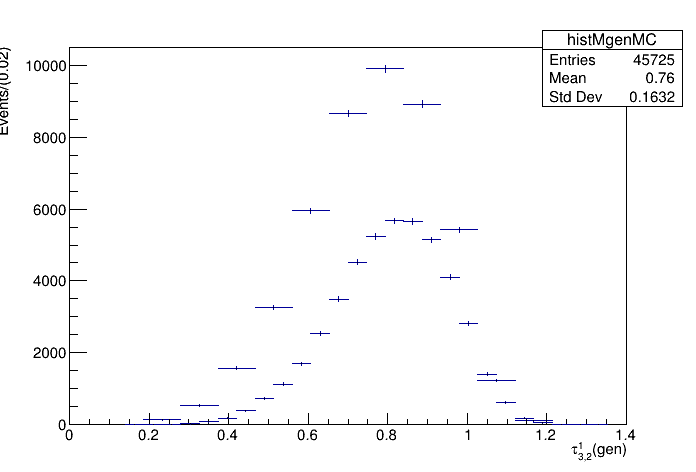

In [118]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


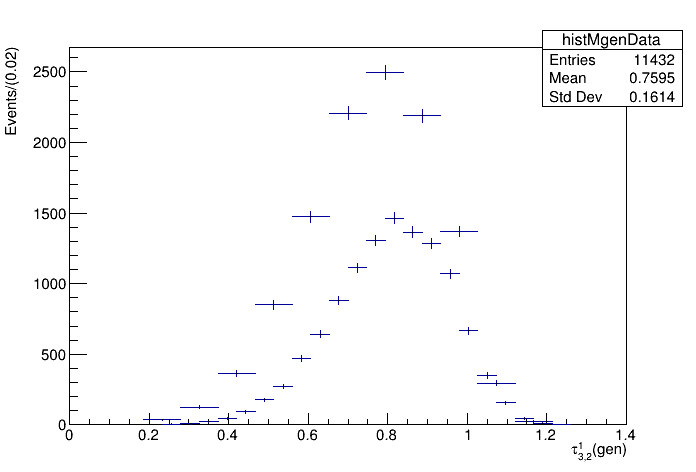

In [119]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

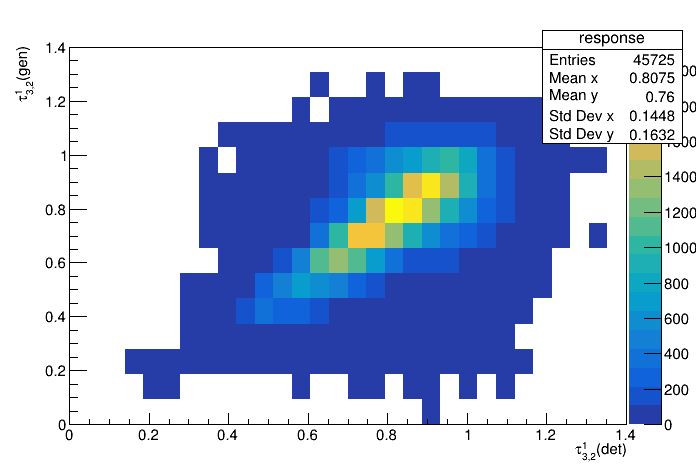

In [120]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [121]:
#### In MC :

Warning in <TCanvas::Constructor>: Deleting canvas with same name: MCcompare


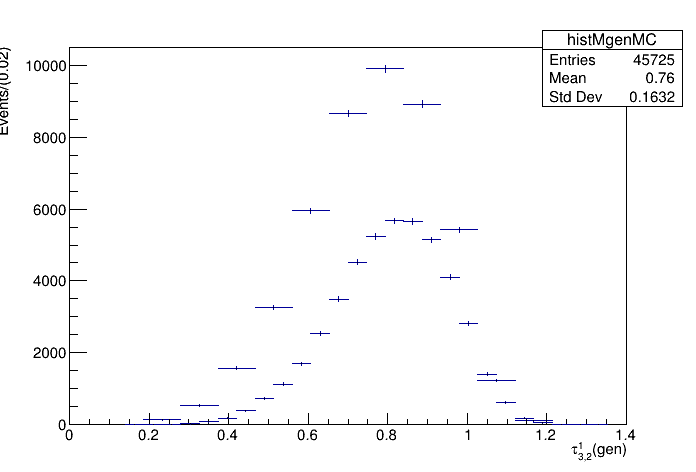

In [122]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: datadists


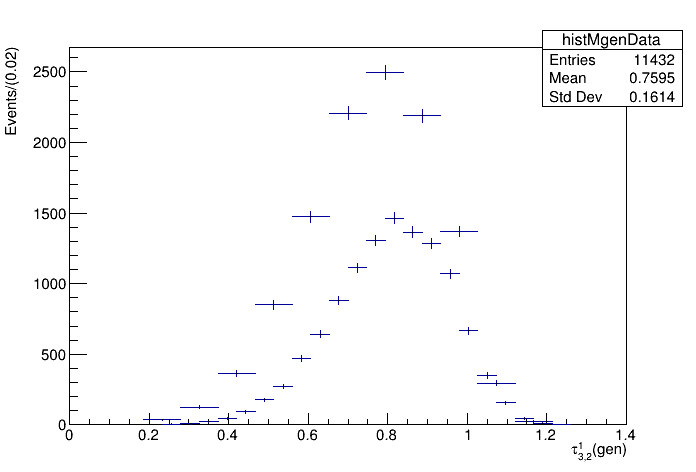

In [123]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [124]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 15-16
Info in <TUnfold::TUnfold>: 30 input bins and 14 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3,2}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #15 (yaxis:#tau_{3,2}^{1}(gen)[1.31,1.4])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #16 (yaxis:#tau_{3,2}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [125]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


8

Warning in <TUnfoldDensity::SetInput>: 8/30 input bins have zero error, and are ignored.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [126]:
print 'regularizing'
nScan=50
tauMin=-4.0
tauMax=4.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

regularizing
doing the unfolding
getting the results


Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=0.815242 Y=8.535162
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.671926 X=0.891893 Y=7.771180
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.171926 X=0.832256 Y=8.108164
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.671926 X=0.816208 Y=8.434336
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.921926 X=0.854384 Y=7.925484
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.421926 X=0.820431 Y=8.297359
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.296926 X=0.825202 Y=8.205218
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.046926 X=0.841854 Y=8.013540
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.796926 X=0.870595 Y=7.845136
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.546926 X=0.817617 Y=8.375559
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.234426 X=0.828429 Y=8.156765
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.109426 X=0.836717 Y=8.060224
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.359426 X=0.822546 Y=8.252483

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


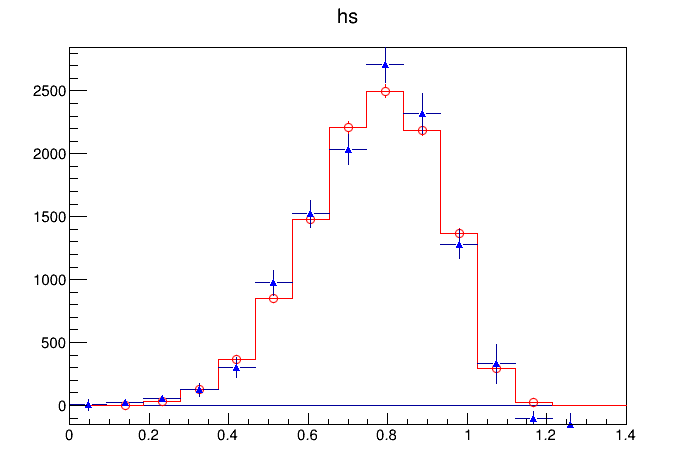

In [127]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()